In [1]:
import path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
games = pd.read_csv("data/csv/game.csv")

In [4]:
game_stats.head()

,game_id,team_id,HoA,won,settled_in,head_coach,goals,shots,hits,pim,powerPlayOpportunities,powerPlayGoals,faceOffWinPercentage,giveaways,takeaways
0,2011030221,1,away,False,OT,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030221,4,home,True,OT,Peter Laviolette,4,36,27,6,6,1,55.1,13,4
2,2011030222,1,away,True,REG,Peter DeBoer,4,35,32,12,4,0,50.9,8,7
3,2011030222,4,home,False,REG,Peter Laviolette,1,20,24,32,5,0,49.1,9,6
4,2011030223,4,away,False,OT,Peter Laviolette,3,28,28,4,5,1,50.8,2,1


In [14]:
n_games_total = len(games['game_id'].unique())
n_games_regular = len(games.loc[games['type']=='R', 'game_id'].unique())

print("Total number of games is", n_games_total)
print("Total number of regular season games is", n_games_regular)
print("Total number of playoff games is", n_games_total-n_games_regular)

Total number of games is 11434
Total number of regular season games is 10642
Total number of playoff games is 792


In [7]:
plays = pd.read_csv("data/csv/game_plays.csv")

In [11]:
plays.head()

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
0,2011030221_1,2011030221,1,NaN,NaN,Game Scheduled,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 18:16:06,0,0,Game Scheduled,NaN,NaN,NaN
1,2011030221_2,2011030221,2,NaN,NaN,Period Ready,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 19:19:49,0,0,Period Ready,NaN,NaN,NaN
2,2011030221_3,2011030221,3,NaN,NaN,Period Start,NaN,NaN,NaN,1,REGULAR,0,1200,2012-04-29 19:20:13,0,0,Period Start,NaN,NaN,NaN
3,2011030221_4,2011030221,4,4.0,1.0,Faceoff,NaN,0.0,0.0,1,REGULAR,0,1200,2012-04-29 19:20:13,0,0,Sean Couturier faceoff won against Patrik Elias,0.0,0.0,right
4,2011030221_5,2011030221,5,4.0,1.0,Giveaway,NaN,28.0,24.0,1,REGULAR,21,1179,2012-04-29 19:21:02,0,0,Giveaway by Kimmo Timonen,-28.0,-24.0,right


In [12]:
relevant_events = ['Faceoff', 'Giveaway', 'Blocked Shot', 'Shot', 
                    'Hit', 'Penalty', 'Takeaway', 'Missed Shot']

plays = plays[plays['event'].isin(relevant_events)] # Predict based on these events
plays = plays[plays['period'] <= 3]
plays = plays.loc[:, ['game_id', 'team_id_for', 'team_id_against', 'event', 'st_x', 'st_y']]

plays = plays.loc[~((plays['st_x']==0) & (plays['st_y']==0) & (plays['event']=='Faceoff'))]
plays = plays.dropna()

In [13]:
n_events = plays.groupby('game_id').size()

In [14]:
print(np.amax(n_events))

366


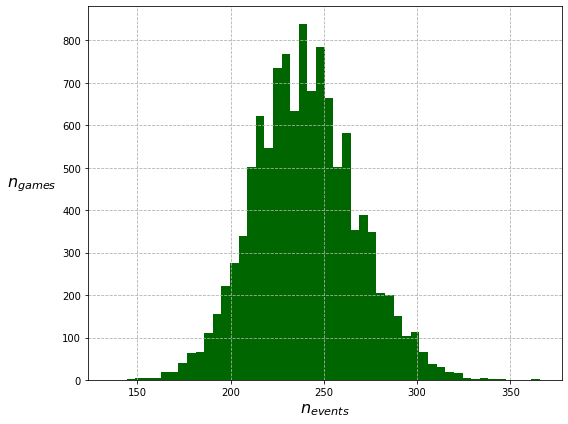

In [28]:
plt.subplots(figsize=(8,6))

plt.hist(n_events, bins=50, color='#006600')

plt.grid(linestyle='dashed')

# plt.title("Number of events per game", fontsize=20)
plt.xlabel('$n_{events}$', fontsize=16)
plt.ylabel('$n_{games}$', rotation=0, labelpad=30, fontsize=16)

plt.tight_layout()
plt.savefig('img/n_events_per_game.png')
plt.show()

In [4]:
# print(plays.head().to_latex(index=False))

In [22]:
games.head()

,game_id,season,type,date_time,date_time_GMT,away_team_id,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,20112012,P,2012-04-29,2012-04-29T19:00:00Z,1,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030222,20112012,P,2012-05-01,2012-05-01T23:30:00Z,1,4,4,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030223,20112012,P,2012-05-03,2012-05-03T23:30:00Z,4,1,3,4,home win OT,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2011030224,20112012,P,2012-05-06,2012-05-06T23:30:00Z,4,1,2,4,home win REG,left,Prudential Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2011030225,20112012,P,2012-05-08,2012-05-08T23:30:00Z,1,4,3,1,away win REG,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT


In [4]:
game_stats = pd.read_csv("data/csv/game_teams_stats.csv")

In [5]:
home = game_stats.loc[game_stats['HoA']=='home']
away = game_stats.loc[game_stats['HoA']=='away']

game_stats = home.merge(away, on='game_id', suffixes=['_home', '_away'])

In [6]:
game_stats.head()

,game_id,team_id_home,HoA_home,won_home,settled_in_home,head_coach_home,goals_home,shots_home,hits_home,pim_home,...,head_coach_away,goals_away,shots_away,hits_away,pim_away,powerPlayOpportunities_away,powerPlayGoals_away,faceOffWinPercentage_away,giveaways_away,takeaways_away
0,2011030221,4,home,True,OT,Peter Laviolette,4,36,27,6,...,Peter DeBoer,3,26,31,12,3,1,44.9,6,7
1,2011030222,4,home,False,REG,Peter Laviolette,1,20,24,32,...,Peter DeBoer,4,35,32,12,4,0,50.9,8,7
2,2011030223,1,home,True,OT,Peter DeBoer,4,31,30,10,...,Peter Laviolette,3,28,28,4,5,1,50.8,2,1
3,2011030224,1,home,True,REG,Peter DeBoer,4,43,19,4,...,Peter Laviolette,2,22,23,10,2,1,62.5,20,5
4,2011030225,4,home,False,REG,Peter Laviolette,1,28,38,8,...,Peter DeBoer,3,30,26,2,4,1,55.0,6,5


In [41]:
def result(x):
    if x[1] == 'OT' or x[1] == 'SO':
        return 'b_tie'
    elif x[0]:
        return 'a_home_win' 
    else:
        return 'c_away_win'

def goal_differential(x):
    if x[0] == 'OT' or x[0] == 'SO':
        return 0
    else:
        return x[1]-x[2]

In [31]:
game_stats['result'] = game_stats.loc[:, ['won_home', 'settled_in_home']].apply(result, axis=1)

In [42]:
game_stats['goal_differential'] = game_stats.loc[:, ['settled_in_home', 'goals_home', 'goals_away']].apply(goal_differential, axis=1)

In [51]:
def pdo(x):
    return 100*(x[0]/(x[2]+x[0]) + x[3]/(x[1]+x[3]))

In [52]:
game_stats['pdo_home'] = game_stats.loc[:, ['goals_home', 'goals_away', 
                                            'shots_home', 'shots_away']].apply(pdo, axis=1)

game_stats['pdo_away'] = game_stats.loc[:, ['goals_away', 'goals_home', 
                                            'shots_away', 'shots_home']].apply(pdo, axis=1)

In [53]:
cor = game_stats[['pdo_home', 'goal_differential']].corr().iloc[0, 1]

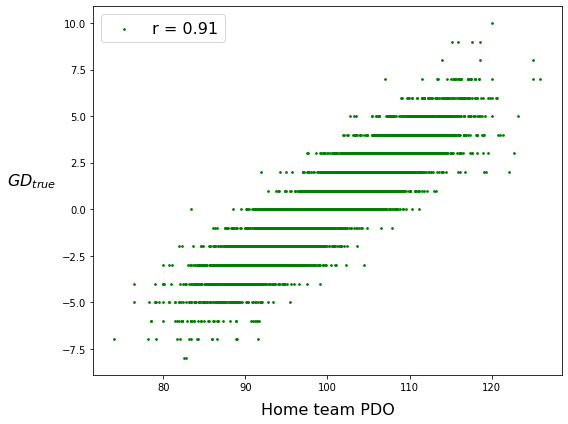

In [54]:
plt.subplots(figsize=(8, 6))

plt.scatter(game_stats['pdo_home'], game_stats['goal_differential'], c='green', s=3, label='r = {0}'.format(np.around(cor, 3)))

plt.legend(fontsize=16)

plt.ylabel('$GD_{true}$', fontsize=16, rotation=0, labelpad=30)
plt.xlabel('Home team PDO', fontsize=16, labelpad=10)
# plt.title('Convolution', fontsize=20)

plt.tight_layout()
# plt.savefig('img/GDpred_vs_PDOhome_cnn.png')

plt.show()

In [34]:
wild_2011 = game_stats.loc[((game_stats['game_id'].astype(str).str.startswith('2011'))
                            & ((game_stats['team_id_home']==30) | (game_stats['team_id_away']==30))), :]

In [36]:
wild_2011 = wild_2011.sort_values(by='game_id')

wild_2011 = wild_2011.loc[:, ['team_id_home', 'team_id_away', 'shots_home', 
                              'goals_home', 'goals_away', 'shots_away']]

In [37]:
wild_2011.head()

,team_id_home,team_id_away,shots_home,goals_home,goals_away,shots_away
10266,30,29,26,4,2,31
10523,2,30,14,2,1,21
10466,9,30,44,3,3,27
10937,30,22,35,1,1,22
9077,30,17,14,2,3,41


In [38]:
def wild_stats(x, against):
    if not against:
        if x[0] == 30:
            return x[1]
        else:
            return x[2]
    else: 
        if x[0] != 30:
            return x[1]
        else:
            return x[2]

In [39]:
wild_2011['shots_for'] = wild_2011.loc[:, ['team_id_home', 'shots_home', 'shots_away']].apply(wild_stats, axis=1, against=False)
wild_2011['shots_against'] = wild_2011.loc[:, ['team_id_home', 'shots_home', 'shots_away']].apply(wild_stats, axis=1, against=True)

wild_2011['goals_for'] = wild_2011.loc[:, ['team_id_home', 'goals_home', 'goals_away']].apply(wild_stats, axis=1, against=False)                                                  
wild_2011['goals_against'] = wild_2011.loc[:, ['team_id_home', 'goals_home', 'goals_away']].apply(wild_stats, axis=1, against=True)

In [8]:
def pdo(x):
    return 100*(x[2]/(x[2]+x[0]) + x[1]/(x[1]+x[3]))

In [41]:
wild_2011['pdo'] = wild_2011.loc[:, ['shots_for', 'shots_against', 'goals_for', 'goals_against']].cumsum().apply(pdo, axis=1)

In [42]:
games = np.arange(1, 83)

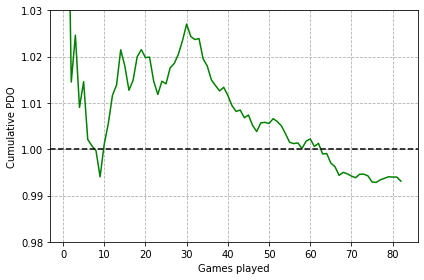

In [45]:
plt.plot(games, wild_2011['pdo'], '#006600')

plt.ylabel('Cumulative PDO')
plt.xlabel('Games played')

plt.ylim(0.98, 1.03)

plt.grid(linestyle='dashed')
plt.axhline(1, 0, 82, c='black', linestyle='dashed')

plt.tight_layout()

plt.savefig('img/wild_pdo.png')
plt.show()

In [4]:
games_with_plays = games[games['game_id'].isin(plays['game_id'])]
games_no_plays = games[~games['game_id'].isin(plays['game_id'])]

In [5]:
print(games_with_plays.shape)
print(games_no_plays.shape)

(11244, 16)
(190, 16)


In [7]:
def result(result, binary=False):
    if not binary:
        if 'OT' in result or 'SO' in result:
            return 'b_tie'
        elif 'home' in result:
            return 'a_home_win'
        else:
            return 'c_away_win'
    else:
        if 'home' in result:
            return 'a_home_win'
        else:
            return 'b_away_win'

In [15]:
games_with_plays['outcome'].value_counts()

home win REG    4786
away win REG    3802
home win OT      780
away win OT      722
away win SO      583
home win SO      571
Name: outcome, dtype: int64

In [16]:
print(games_with_plays['outcome'].apply(result, binary=False).value_counts()

a_home_win    4786
c_away_win    3802
b_tie         2656
Name: outcome, dtype: int64

In [20]:
print(games_with_plays['outcome'].apply(result, binary=False).value_counts() / len(games_with_plays))
print(games_with_plays['outcome'].apply(result, binary=True).value_counts() / len(games_with_plays))

a_home_win    0.425649
c_away_win    0.338136
b_tie         0.236215
Name: outcome, dtype: float64
a_home_win    0.545802
b_away_win    0.454198
Name: outcome, dtype: float64


In [ ]:
# plays[((plays['event'] == 'Goal') & (plays['st_x'] == 55))].head()

In [3]:
plays[plays['event'] == "Emergency Goaltender"]

,play_id,game_id,play_num,team_id_for,team_id_against,event,secondaryType,x,y,period,periodType,periodTime,periodTimeRemaining,dateTime,goals_away,goals_home,description,st_x,st_y,rink_side
932301,2014020946_342,2014020946,342,NaN,NaN,Emergency Goaltender,NaN,NaN,NaN,3,REGULAR,1200,0,2015-03-04 02:35:38,3,2,-,NaN,NaN,NaN
1634415,2017021196_338,2017021196,338,NaN,NaN,Emergency Goaltender,NaN,NaN,NaN,3,REGULAR,1200,0,2018-03-30 04:24:11,2,6,-,NaN,NaN,NaN
2600258,2018020520_307,2018020520,307,NaN,NaN,Emergency Goaltender,NaN,NaN,NaN,3,REGULAR,1200,0,2018-12-19 02:39:44,2,3,-,NaN,NaN,NaN


In [ ]:
# plays.groupby(['game_id']).size().describe()

In [203]:
print(plays['event'].value_counts())

Faceoff                     674022
Shot                        626037
Hit                         531273
Stoppage                    526985
Blocked Shot                324663
Missed Shot                 266975
Giveaway                    194516
Takeaway                    155700
Penalty                      92745
Goal                         64210
Period Start                 37638
Period Ready                 37590
Period End                   37585
Period Official              37584
Game End                     11244
Game Scheduled               11240
Shootout Complete             1183
Official Challenge             871
Game Official                  229
Early Intermission End          28
Early Intermission Start        28
Emergency Goaltender             3
Name: event, dtype: int64


In [201]:
print(plays['event'].unique())
print(len(plays['event'].unique()))

['Game Scheduled' 'Period Ready' 'Period Start' 'Faceoff' 'Giveaway'
 'Blocked Shot' 'Shot' 'Hit' 'Stoppage' 'Goal' 'Penalty' 'Takeaway'
 'Missed Shot' 'Period End' 'Period Official' 'Game End' 'Game Official'
 'Official Challenge' 'Shootout Complete' 'Early Intermission Start'
 'Early Intermission End' 'Emergency Goaltender']
22


In [ ]:
relevant_events = ['Goal']
plays = plays.loc[plays['event'].isin(relevant_events),:]

In [7]:
unique_x = np.sort(plays['st_x'].unique()[1:])
prop_goal_x = np.zeros(len(unique_x))

In [14]:
len(plays.loc[(plays['st_x']==x) & (plays['event']=='Shot'), :])

29

In [16]:
for i, x in enumerate(unique_x):
    n_goals = len(plays.loc[(plays['st_x']==x) & (plays['event']=='Goal'), :])
    n_shots = len(plays.loc[(plays['st_x']==x) & (plays['event']=='Shot'), :])
    prop_goal_x[i] = n_goals / (n_goals + n_shots)

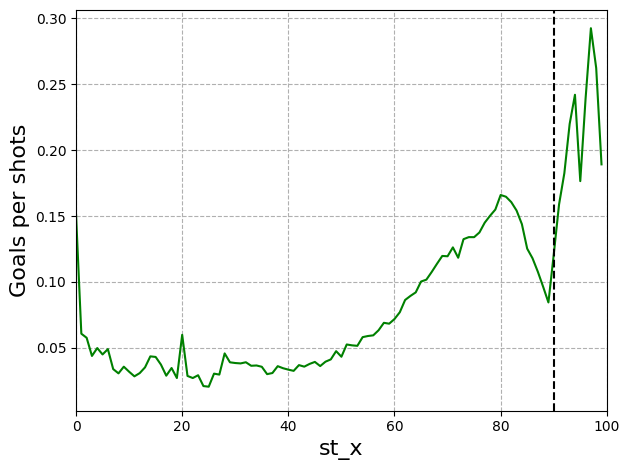

In [50]:
plt.style.use('default')

plt.plot(unique_x, prop_goal_x, 'green')

plt.xlabel('st_x', fontsize=16)
plt.ylabel('Goals per shots', fontsize=16)

# plt.axvline(25, 0, 1, c='black', linestyle='dashed')
plt.axvline(90, 0, 1, c='black', linestyle='dashed', linewidth=3)
plt.xlim(0, 100)
plt.grid(linestyle='dashed')

plt.tight_layout()
plt.savefig('img/prop_goals_x.png')

plt.show()

In [33]:
print(len(plays.loc[(plays['st_x']>90) & (plays['event']=='Goal')]))

373


In [51]:
print("Proportion of goals scored behind the goal line:", 
      len(plays.loc[(plays['st_x']>90) & (plays['event']=='Goal')]) / len(plays.loc[plays['event']=='Goal']))

Proportion of goals scored behind the goal line: 0.005809064008721383


In [39]:
plays.loc[(plays['st_x']>90) & (plays['event']=='Goal'), ['dateTime', 'description', 'period', 'periodTimeRemaining']].head()

,dateTime,description,period,periodTimeRemaining
12621,2011-05-01 03:30:08,"Ryan Suter (1) Wrist Shot, assists: Martin Era...",3,67
14924,2011-05-08 01:15:13,"David Legwand (5) Wrist Shot, assists: none",2,1149
58330,2011-04-21 00:11:56,"Artem Anisimov (1) Wrist Shot, assists: Chris ...",2,876
76598,2012-05-26 02:47:18,"Adam Henrique (3) Wrist Shot, assists: Ilya Ko...",4,1137
96663,2016-04-15 03:59:21,"Jeff Carter (1) Wrist Shot, assists: Milan Luc...",2,750


In [35]:
unique_y = np.sort(plays['st_y'].unique()[1:])
prop_goal_y = np.zeros(len(unique_y))

for i, y in enumerate(unique_y):
    n_goals = len(plays.loc[(plays['st_y']==y) & (plays['event']=='Goal'), :])
    n_shots = len(plays.loc[(plays['st_y']==y) & (plays['event']=='Shot'), :])
    prop_goal_y[i] = n_goals / (n_goals + n_shots)

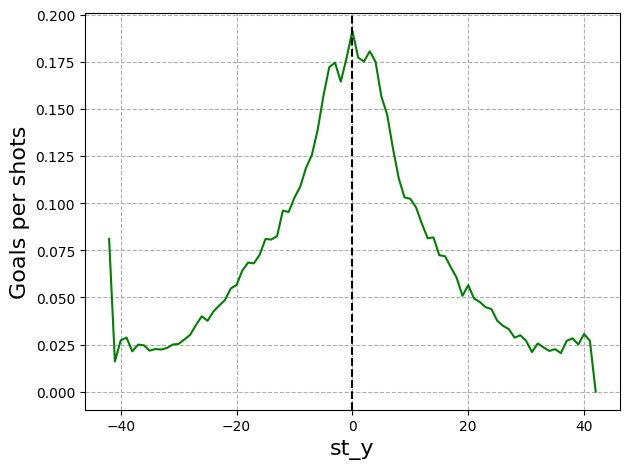

In [49]:
plt.style.use('default')

plt.plot(unique_y, prop_goal_y, 'green')

plt.xlabel('st_y', fontsize=16)
plt.ylabel('Goals per shots', fontsize=16)

plt.axvline(0, 0, 1, c='black', linestyle='dashed')
plt.grid(linestyle='dashed')
plt.tight_layout()

plt.savefig('img/prop_goals_y.png')
plt.show()

In [ ]:
plays['game_time'] = (plays['period']-1)*1200+plays['periodTime']
# plays = plays.loc[plays['game_time'] <= 3000, :]

In [ ]:
plays = plays.loc[~((plays['x']==0) & (plays['y']==0) & (plays['event']=='Faceoff'))]

In [ ]:
# plays = plays.dropna()

In [73]:
relevant_events = ['Faceoff', 'Giveaway', 'Blocked Shot', 'Shot', 
                    'Hit', 'Penalty', 'Takeaway', 'Missed Shot']

plays = plays[plays['event'].isin(relevant_events)] 
    # Only predict based on these events

    # plays['game_time'] = (plays['period']-1)*1200+plays['periodTime']
plays = plays[plays['period'] <= 3] # Only plays in regulation included
    
relevant_columns = ['game_id', 'team_id_for', 'team_id_against', 
                        'event', 'st_x', 'st_y']
plays = plays.loc[:, relevant_columns]

plays = plays.loc[~((plays['st_x']==0) & (plays['st_y']==0) & (plays['event']=='Faceoff'))]

print("Number of rows dropped:", plays.shape[0]-plays.dropna().shape[0])
print("Proportion of rows dropped:", (plays.shape[0]-plays.dropna().shape[0]) / plays.shape[0])
plays = plays.dropna()

Number of rows dropped: 6607
Proportion of rows dropped: 0.002440800340167845


In [74]:
plays = pd.get_dummies(plays, columns=['event'])
plays['event_dummy'] = 0

plays.rename(columns=lambda x: x.replace(' ', '_').lower(), inplace=True)

games = games.loc[games['game_id'].isin(plays['game_id'].unique()), :]
games = games.sort_values(by='game_id')

plays = plays.merge(games, on='game_id')

In [21]:
plays.head()

,game_id,team_id_for,team_id_against,st_x,st_y,event_blocked_shot,event_faceoff,event_giveaway,event_hit,event_missed_shot,...,home_team_id,away_goals,home_goals,outcome,home_rink_side_start,venue,venue_link,venue_time_zone_id,venue_time_zone_offset,venue_time_zone_tz
0,2011030221,4.0,1.0,-28.0,-24.0,0,0,1,0,0,...,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
1,2011030221,4.0,1.0,-52.0,-28.0,1,0,0,0,0,...,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
2,2011030221,1.0,4.0,80.0,-3.0,0,0,0,0,0,...,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
3,2011030221,1.0,4.0,-30.0,-38.0,0,0,0,1,0,...,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT
4,2011030221,4.0,1.0,60.0,-39.0,0,0,1,0,0,...,4,3,4,home win OT,right,Wells Fargo Center,/api/v1/venues/null,America/New_York,-4,EDT


In [60]:
def home_team_for(ids):
    if ids[0] == ids[1]:
        return 1
    else:
        return 0

plays['home_team_for'] = plays[['team_id_for', 'home_team_id']].apply(
                     home_team_for, axis=1)

In [75]:
X = np.load('data/numpy/X_result_no_measures.npy')

In [81]:
print(X[0, -8, :])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [15]:
print(plays['event'].value_counts())

Shot            610054
Faceoff         553149
Hit             526797
Blocked Shot    319503
Missed Shot     260704
Giveaway        191950
Takeaway        152761
Penalty          85374
Name: event, dtype: int64


In [ ]:
# plays.groupby(['game_id']).size()

In [61]:
predict_columns = ['game_id', 'st_x', 'st_y', 'distance', 'angle',
                        'home_team_for', 'offensive_zone_home', 'offensive_zone_away']

plays = plays.loc[:, (plays.columns.isin(predict_columns) | 
            plays.columns.str.contains('event'))]

In [64]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [65]:
scale_columns = ['st_x', 'st_y', 'distance', 'angle']
plays.loc[:, plays.columns.isin(scale_columns)] = scaler.fit_transform(
                            plays.loc[:, plays.columns.isin(scale_columns)])

In [69]:
print(plays.loc[plays['game_id']==2011030221, ['home_team_for', 'event_blocked_shot', 'event_giveaway', 'event_dummy', 'st_x', 'st_y']].head(2).to_latex(index=False))

\begin{tabular}{rrrrrr}
\toprule
 home\_team\_for &  event\_blocked\_shot &  event\_giveaway &  event\_dummy &      st\_x &      st\_y \\
\midrule
             1 &                   0 &               1 &            0 & -0.571569 & -1.018541 \\
             1 &                   1 &               0 &            0 & -0.941974 & -1.187034 \\
\bottomrule
\end{tabular}



In [43]:
plays = plays[plays['period'] <= 3]

goals = plays.loc[plays['event']=='Goal', ['st_x', 'st_y']]
goals = goals.dropna()

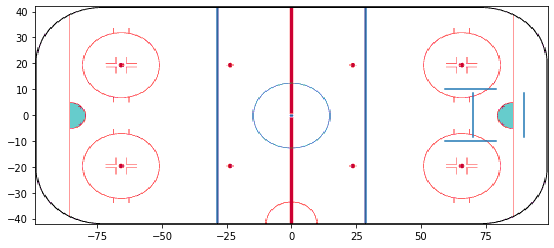

In [53]:
from matplotlib.patches import Rectangle

rink = plt.imread("img/hockey-rink.png")
plt.subplots(figsize=(10,4))

limits = (plays['st_x'].min(), plays['st_x'].max(), plays['st_y'].min(), plays['st_y'].max())

# ax = sns.kdeplot(goals['st_x'], goals['st_y'], shade=True)
# ax.collections[0].set_alpha(0)

Rectangle.axvline(70, 90)

plt.axvline(70, 0.4, 0.6)
plt.axvline(90, 0.4, 0.6)

plt.axhline(10, 0.8, 0.9)
plt.axhline(-10, 0.8, 0.9)


plt.imshow(rink, extent=limits)

plt.show()

In [44]:
high_danger_goals = goals.loc[(goals['st_x'] >= 70) & (goals['st_x'] <= 90) & (np.abs(goals['st_y']) <= 10)]

In [45]:
len(high_danger_goals) / len(goals)

0.5031452820768847

In [46]:
shots = ['Shot']

shots = plays.loc[plays['event'].isin(shots), ['st_x', 'st_y']]
shots = shots.dropna()

In [47]:
high_danger_shots = shots.loc[(shots['st_x'] >= 70) & (shots['st_x'] <= 90) & (np.abs(shots['st_y']) <= 10)]

In [48]:
print(len(high_danger_goals) / (len(high_danger_shots) + len(high_danger_goals)))

0.1796125444813431


In [49]:
print(len(high_danger_shots) / (len(plays['game_id'].unique())))

12.28166133048737


In [50]:
print(len(high_danger_goals) / (len(plays['game_id'].unique())))

2.688900747065101
